# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rc
df = pd.read_csv("US_Crime_Rates_1960_2014.csv")

In [50]:
df

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969,201385000,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


In [51]:

df.set_index("Year", inplace=True)


<AxesSubplot:xlabel='Year'>

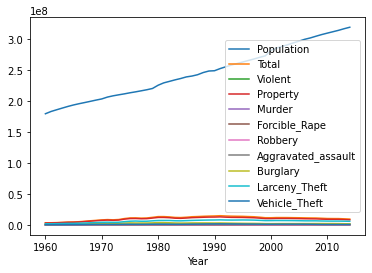

In [52]:
df.plot()

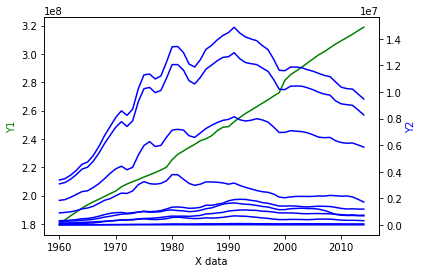

In [53]:
columnas = df.drop("Population",axis=1)
x = df.index
y1 = df["Population"]
y2 = columnas

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x,y1,'g-')
ax2.plot(x,y2,'b-')
 
ax1.set_xlabel("X data")
ax1.set_ylabel("Y1",color='g')
 
ax2.set_ylabel("Y2",color='b')
 
plt.show()

In [54]:
df.drop("Population",inplace=True,axis=1)
df.drop("Total",inplace=True,axis=1)

In [55]:
df.corr()["Murder"].sort_values(ascending=False)


Murder                1.000000
Robbery               0.960156
Burglary              0.920207
Property              0.895641
Vehicle_Theft         0.856600
Larceny_Theft         0.806279
Violent               0.795300
Forcible_Rape         0.699655
Aggravated_assault    0.668511
Name: Murder, dtype: float64

In [56]:
X = df[["Robbery","Burglary","Property","Vehicle_Theft","Larceny_Theft"]]
y = df["Murder"]

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [58]:
polinominal_model = PolynomialFeatures(6) 
X_poly = polinominal_model.fit_transform(X_train,y_train)
model = LinearRegression()

In [59]:
model.fit(X_poly, y_train)
y_pred = model.predict(X_poly)

In [60]:
print("Score:", r2_score(y_train, y_pred)*100, "% ")

Score: 99.99999999977577 % 


In [63]:
from sklearn.model_selection import RepeatedStratifiedKFold, KFold
polinominal_model = PolynomialFeatures() 
X_poly = polinominal_model.fit_transform(X_train,y_train)
model = LinearRegression()
kfold = RepeatedKFold(n_splits=23, n_repeats=7, random_state=7)
cv_results = cross_val_score(model, X_poly, y_train, cv=kfold)

C:\Users\34606\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\34606\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\34606\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\34606\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\34606\AppData\Local\Programs\Python\Python37\lib\si

In [64]:
### No entiendo porque me sale este mensaje, tengo que repasar cross validation